In [1]:
import pandas as pd
import numpy as np
import talib as ta
import yfinance as yf
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import joypy
%matplotlib inline

plt.style.use('bmh')

In [2]:
# Download historical data
data = yf.download('^GDAXI')[['Open','High' ,'Low','Close']]

[*********************100%***********************]  1 of 1 downloaded


In [3]:
df = data.copy()

In [4]:
# Calculate 52-Week range High-Low
df['52W_low'] = df.Low.rolling(252).min()
df['52W_high'] = df.High.rolling(252).max()

df.dropna(inplace=True)

In [5]:
# DataSet last five rows
df.tail()

,Open,High,Low,Close,52W_low,52W_high
Date,,,,,,
2019-09-26,12227.77,12313.15,12223.29,12288.54,10279.2,12656.05
2019-09-27,12327.79,12404.47,12324.71,12380.94,10279.2,12656.05
2019-09-30,12367.81,12441.03,12346.94,12428.08,10279.2,12656.05
2019-10-01,12469.67,12497.28,12263.83,12263.83,10279.2,12656.05
2019-10-02,12221.74,12226.86,12030.99,12034.00,10279.2,12656.05


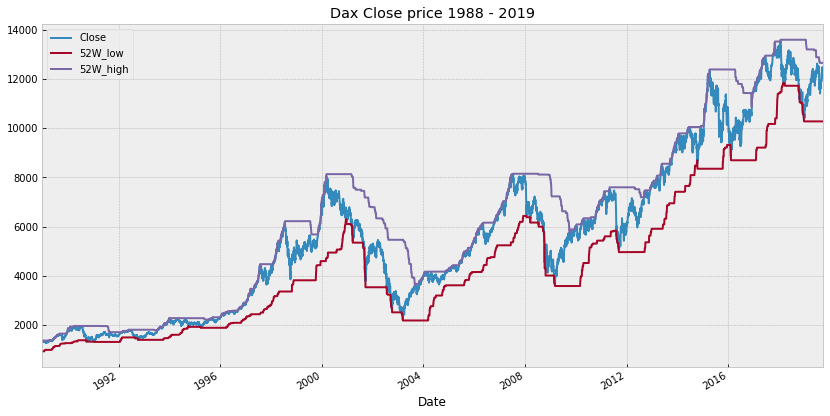

In [6]:
# Plot historical data Close price, 52 week highest price, 52 week lowest price
df[['Close','52W_low','52W_high']].plot(figsize=(14,7));
plt.title(f'Dax Close price {df.index[0].year} - {df.index[-1].year}');

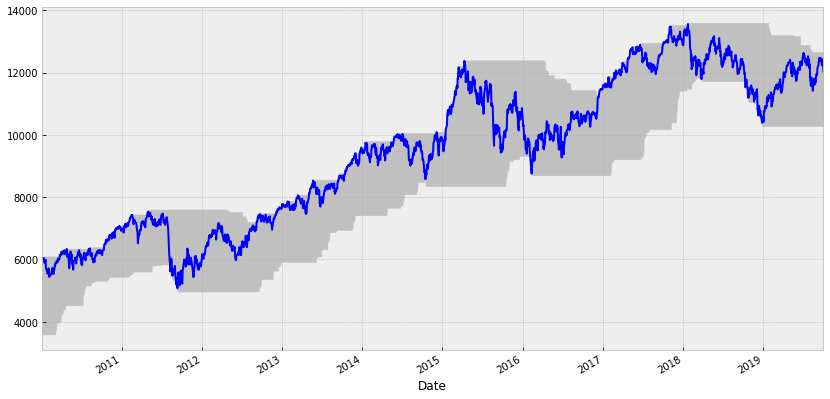

In [7]:
# Plot same chart from 2010 with fill between 52W_high and 52W_low
df['2010':]['Close'].plot(figsize=(14,7), color='b');
plt.fill_between(df.loc['2010':].index, df.loc['2010':]['52W_high'], df.loc['2010':]['52W_low'], color='silver');

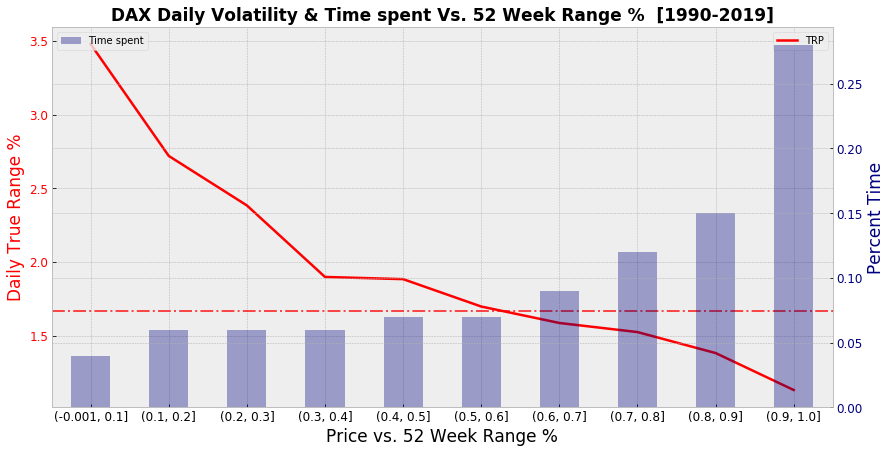

In [8]:
# Calculate True Range Percent (TRP) expresses the True Range (TR) as a percentage of a bar’s closing price
df['TRP'] = (((np.maximum(df.High, df.Close.shift(1)) - np.minimum(df.Low, df.Close.shift(1))) / df.Close) * 100).round(2)
# Calculate Close price vs rolling 52 Week Range %
df['52w_range'] = ((df.Close - df.Low.rolling(252).min()) / (df.High.rolling(252).max() - df.Low.rolling(252).min())).round(2)
df.dropna(inplace=True)

fig, ax = plt.subplots(figsize=(14,7))

df.groupby(pd.cut(df['52w_range'],10))['TRP'].mean().plot(fontsize=12, color='r', lw=2.5,legend=True)
plt.axhline(df['TRP'].mean(), linestyle="-.", lw=2, color='red', alpha=0.7);
plt.xlabel('Price vs. 52 Week Range %', fontsize=17);
plt.yticks(color='r')
plt.ylabel('Daily True Range %', fontsize=17, color='r');
plt.title(f'DAX Daily Volatility & Time spent Vs. 52 Week Range %  [{df.index[0].year}-{df.index[-1].year}]',
          weight="bold",fontsize=17)

ax2 = ax.twinx()
(df.groupby(pd.cut(df['52w_range'],10)).size()/ len(df)).round(2).plot(kind='bar',
 fontsize=12, color='navy', alpha=0.35,label='Time spent',legend=True);
plt.ylabel("Percent Time", fontsize=17, color='navy') ; plt.yticks(c='navy');

In [9]:
# Statistics can be seen at all levels (segments)
df.groupby(pd.cut(df['52w_range'],10))['TRP'].describe()

,count,mean,std,min,25%,50%,75%,max
52w_range,,,,,,,,
"(-0.001, 0.1]",329.0,3.479362,2.136243,0.05,2.0000,3.060,4.6300,15.39
"(0.1, 0.2]",418.0,2.720072,1.899863,0.01,1.4350,2.365,3.5450,10.54
"(0.2, 0.3]",471.0,2.384183,1.492844,0.08,1.3550,2.110,3.0750,10.79
"(0.3, 0.4]",472.0,1.898602,1.200075,0.01,1.0550,1.660,2.5725,8.15
"(0.4, 0.5]",552.0,1.883696,1.167977,0.01,1.0675,1.695,2.4200,10.11
"(0.5, 0.6]",495.0,1.697838,1.065527,0.03,1.0250,1.580,2.1500,13.86
"(0.6, 0.7]",653.0,1.586202,0.904987,0.01,0.9900,1.430,2.0000,6.37
"(0.7, 0.8]",905.0,1.524376,0.857299,0.01,0.9000,1.380,1.9100,4.99
"(0.8, 0.9]",1116.0,1.382043,0.791323,0.00,0.8200,1.260,1.8100,6.49


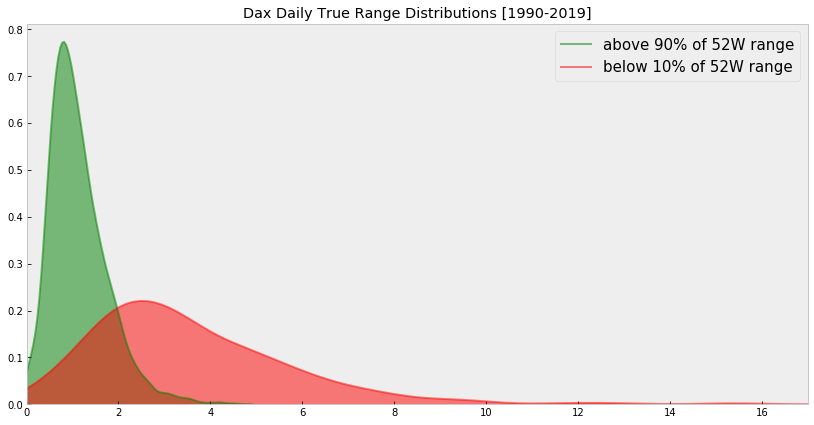

In [10]:
# Lowest segment disribution vs highest segment distribution 
plt.figure(figsize=(14,7))
sns.kdeplot(df[df['52w_range'] >0.9]['TRP'], shade=True, color="g", label="above 90% of 52W range", alpha=.5)
sns.kdeplot(df[df['52w_range'] <0.1]['TRP'], shade=True, color="r", label="below 10% of 52W range", alpha=.5)
plt.title(f"Dax Daily True Range Distributions [{df.index[0].year}-{df.index[-1].year}]");
plt.xlim(0,17); plt.legend(fontsize=15); plt.grid();

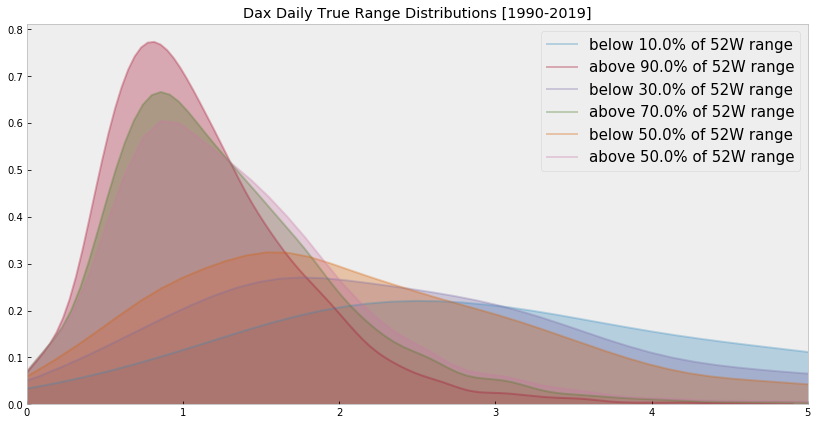

In [11]:
plt.figure(figsize=(14,7))

for i in np.arange(0.1,0.6,0.2):
    
    sns.kdeplot(df[df['52w_range']<i]['TRP'], shade=True, label=f"below {(i*100).round(2)}% of 52W range", alpha=.3)
    sns.kdeplot(df[df['52w_range']>(1-i)]['TRP'], shade=True, label=f"above {((1-i)*100).round(2)}% of 52W range", alpha=.3)
    
    plt.title(f"Dax Daily True Range Distributions [{df.index[0].year}-{df.index[-1].year}]")
    plt.xlim(0,5); plt.legend(fontsize=15); plt.grid();

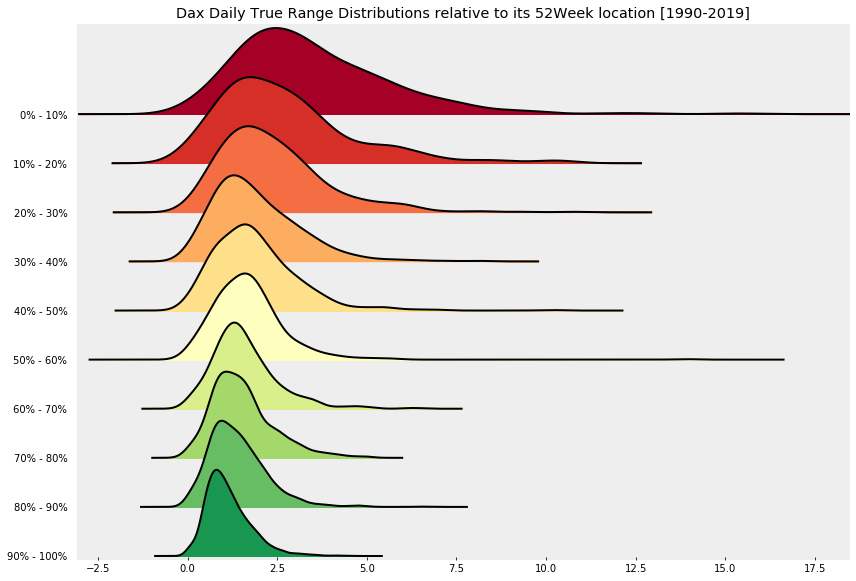

In [12]:
# Specified the labels for the returned bins and used stacked density plots to visually compare distributions
df['segment'] = pd.cut(df['52w_range'],10, labels=[str(f'{i}% - {i+10}%') for i in range(0,100,10)])
fig, axes = joypy.joyplot(df[['TRP','segment']],by='segment',figsize=(12,8),range_style='own',ylim='own',colormap=cm.RdYlGn);
plt.title(f"Dax Daily True Range Distributions relative to its 52Week location [{df.index[0].year}-{df.index[-1].year}]");